In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import re 
import string 
import nltk 
from nltk.corpus import stopwords 
from nltk.stem import LancasterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
import joblib
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator


In [3]:
train_data = r'C:\Users\User\OneDrive\Desktop\Tushar\Encryptix Projects\MOVIE GENRE\Genre Classification Dataset\train_data.txt'
test_data = r'C:\Users\User\OneDrive\Desktop\Tushar\Encryptix Projects\MOVIE GENRE\Genre Classification Dataset\test_data.txt'

In [4]:
df_train = pd.read_csv(train_data,sep=":::", names=["TITLE", "GENRE", "DESCRIPTION"], engine="python")
df_train


,TITLE,GENRE,DESCRIPTION
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [5]:

df_test = pd.read_csv(test_data, sep=":::", names=["ID","TITLE","DESCRIPTION"], engine="python")
df_test

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        54214 non-null  object
 1   GENRE        54214 non-null  object
 2   DESCRIPTION  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [7]:
df_train.describe()


,TITLE,GENRE,DESCRIPTION
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [8]:
df_train.isnull().sum()

TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

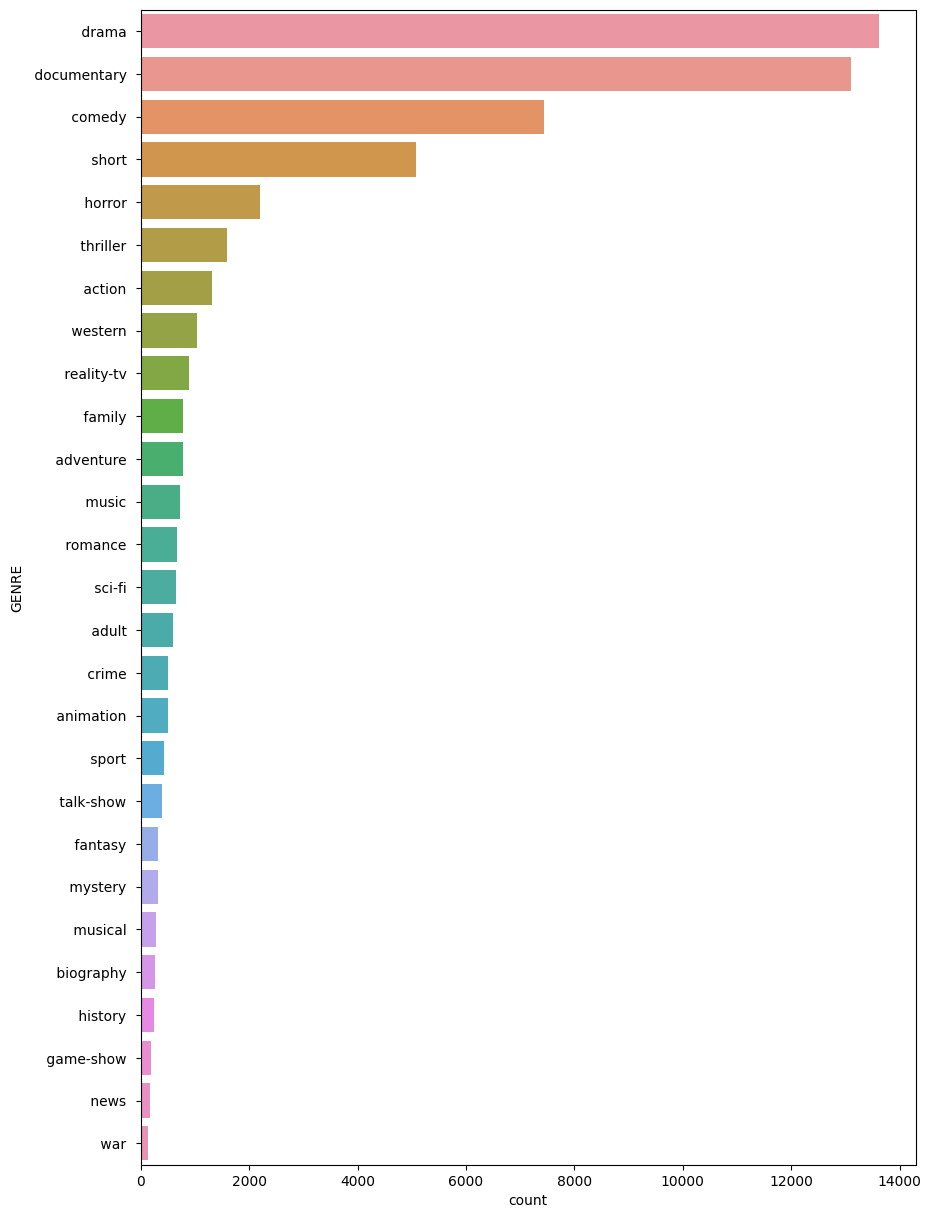

In [9]:
plt.figure(figsize=(10,15))
sns.countplot(data=df_train, y="GENRE", order= df_train["GENRE"].value_counts().index)
plt.show()

In [10]:
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [11]:
df_test.describe()


,ID
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [12]:
df_test.isnull().sum()

ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

In [13]:
class TextCleaner(BaseEstimator, TransformerMixin):
    def __init__(self):
        nltk.download('punkt')
        nltk.download('stopwords')
        self.stemmer = LancasterStemmer()
        self.stop_words = set(stopwords.words("english"))

    def cleaning_data(self, text):
        text = text.lower()
        text = re.sub(r'@\S+', '', text)
        text = re.sub(r'http\S+', '', text)
        text = re.sub(r'.pic\S+', '', text)
        text = re.sub(r'[^a-zA-Z+]', ' ', text)
        text = "".join([i for i in text if i not in string.punctuation])
        words = nltk.word_tokenize(text)
        text = " ".join([i for i in words if i not in self.stop_words and len(i) > 2])
        text = re.sub(r"\s+", " ", text).strip()
        return text

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return [self.cleaning_data(text) for text in X]

In [14]:

X_train = df_train["DESCRIPTION"]

X_test = df_test["DESCRIPTION"]

In [15]:
X = X_train
y = df_train["GENRE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

print(f"Original dataset size: {len(X)}")
print(f"Sampled dataset size: {len(X_test)}")

Original dataset size: 54214
Sampled dataset size: 5422


In [16]:
pipeline = Pipeline([
    ('cleaner', TextCleaner()),
    ('tfidf', TfidfVectorizer()),
    ('svc', SVC())
])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
X_small = X_train[::40000]
y_small = y_train[::40000]
pipeline.fit(X_small, y_small)

Pipeline(steps=[('cleaner', TextCleaner()), ('tfidf', TfidfVectorizer()),
                ('svc', SVC())])

In [18]:
joblib.dump(pipeline, 'movie_genre_predictor.pkl')


['movie_genre_predictor.pkl']